##### Importación del archivo de uso (Datos de Marketing para un Banco):
https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:/Users/thehe/OneDrive/Escritorio/EBAC/Tareas/6. Machine Learning (M41 - )/M41 (Intro Machine Learning I)')
print(os.getcwd())

df = pd.read_csv('bank-additional-full.csv', sep=';')

C:\Users\thehe\OneDrive\Escritorio\EBAC\Tareas\6. Machine Learning (M41 - )\M41 (Intro Machine Learning I)


##### Exploración básica EDA usando pandas: tail, sample, shape, info 

In [5]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2119,38,technician,married,professional.course,no,no,no,telephone,may,mon,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15580,39,blue-collar,single,basic.4y,unknown,no,no,telephone,jul,fri,...,24,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
35119,38,services,married,basic.6y,unknown,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
8124,38,student,single,university.degree,no,no,no,telephone,jun,mon,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
40395,48,admin.,divorced,university.degree,no,no,no,cellular,aug,thu,...,3,3,6,success,-1.7,94.027,-38.3,0.904,4991.6,yes


In [6]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.shape

(41188, 21)

In [8]:
# Trasnformación de variables tipo objeto a categóricas

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

##### Validar si es que existen nulos o información vacía, tipo de datos, describe, nunique

In [9]:
print(f'En esta data hay presencia de {df.isnull().sum().sum()} valores nulos.')

En esta data hay presencia de 0 valores nulos.


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [11]:
df.nunique().sort_values(ascending=False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
job                 12
nr.employed         11
month               10
emp.var.rate        10
previous             8
education            8
day_of_week          5
marital              4
default              3
poutcome             3
loan                 3
housing              3
contact              2
y                    2
dtype: int64

##### Correlación y heat map, visualización de distribución sns.distplot

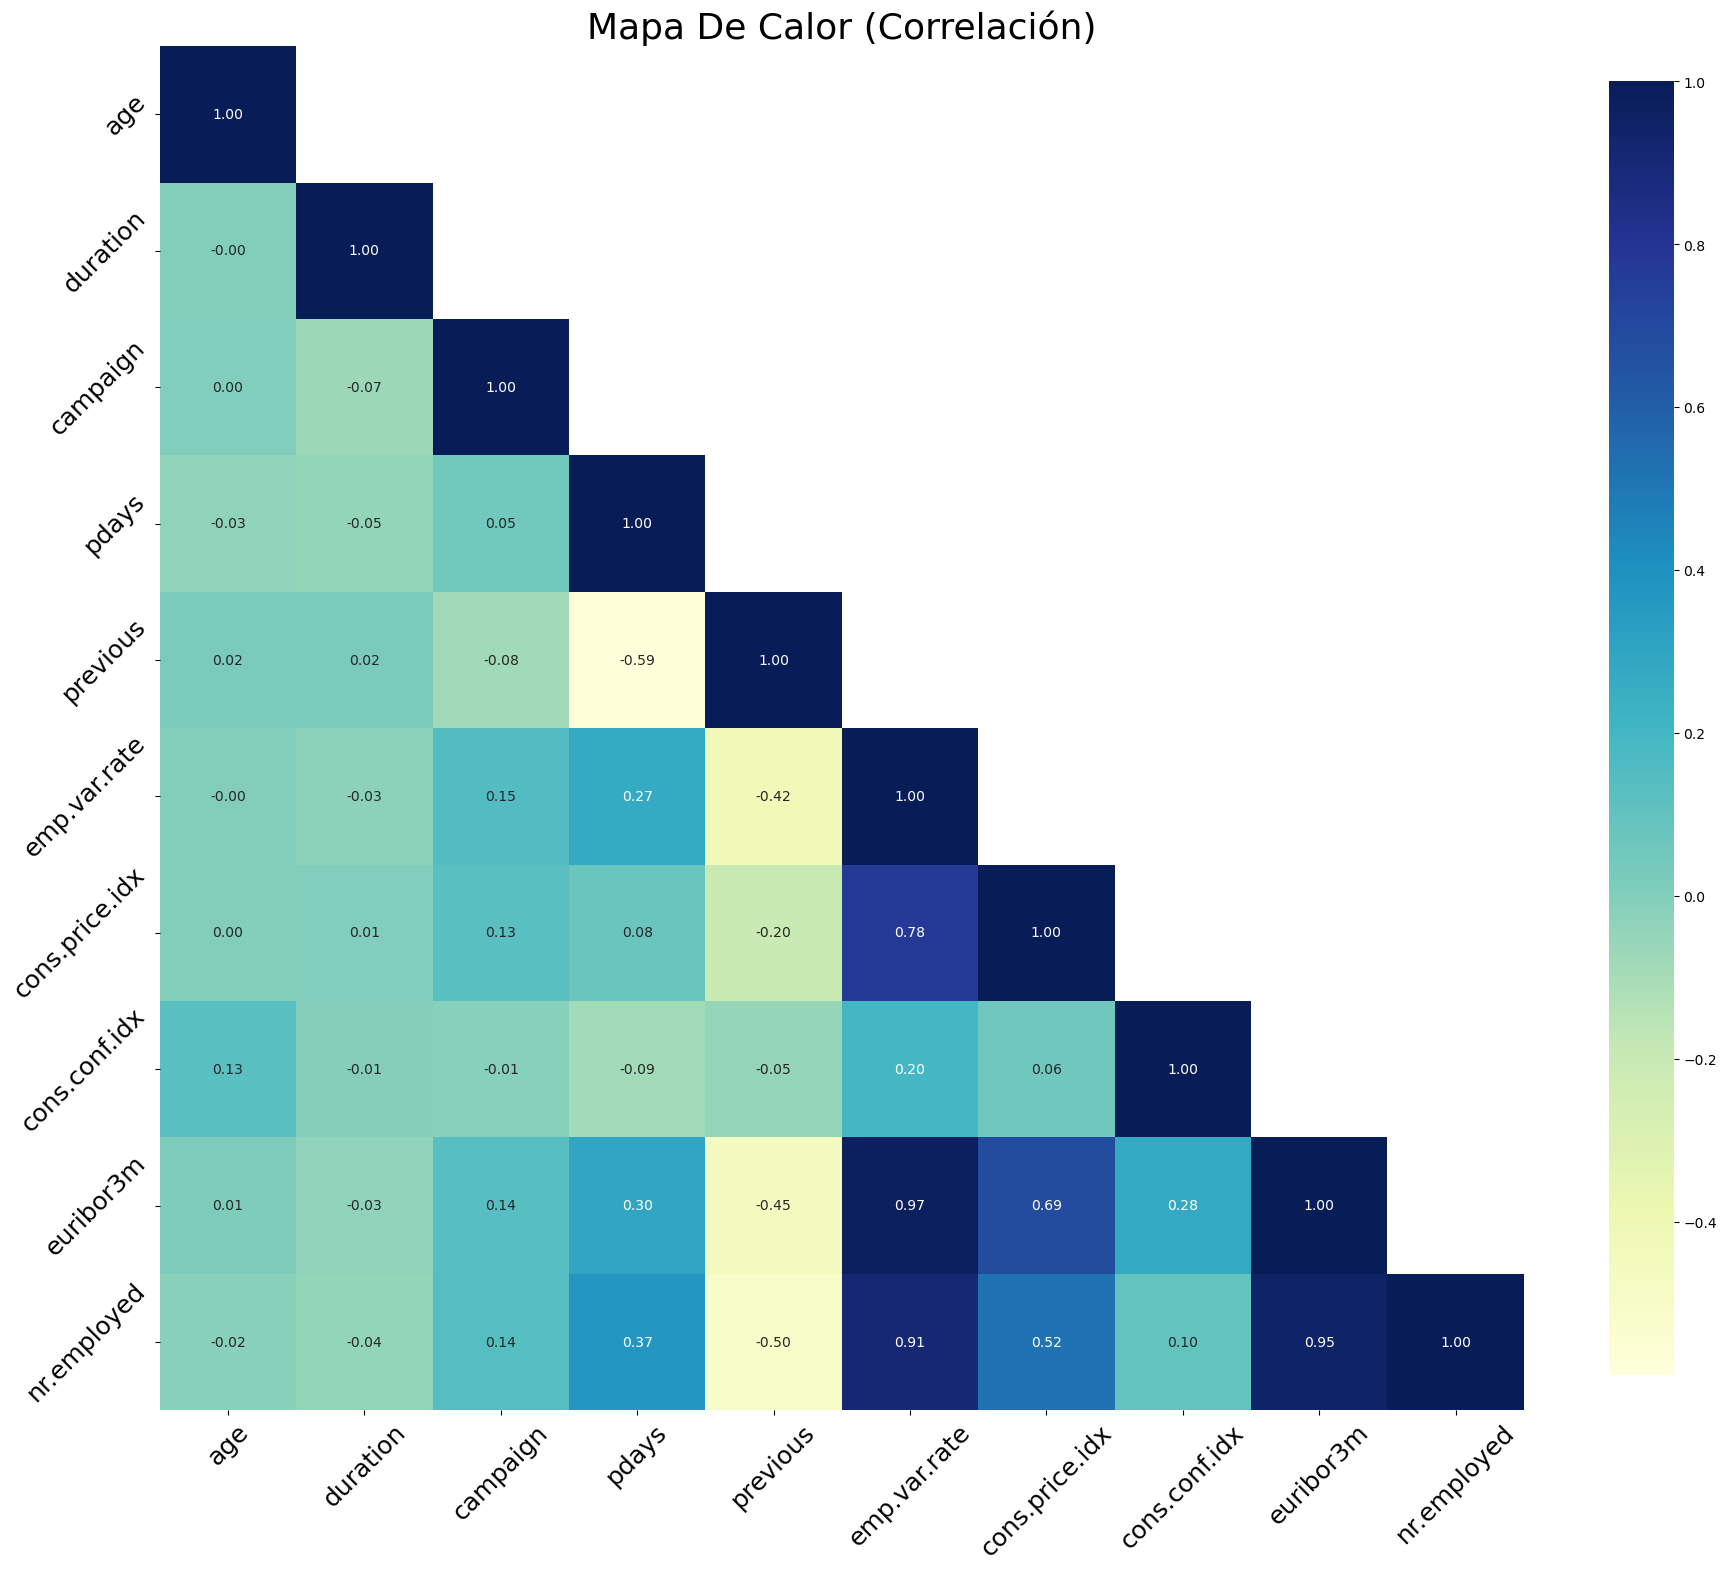

In [12]:
# Se filtran solo las variables numéricas para el análisis de correlación

plt.figure(figsize=(22,28))
df_corr = df.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt = df_corr.where(np.tril(np.ones(df_corr.shape)).astype(bool))
hmap = sns.heatmap(df_lt, annot=True, fmt='.2f', square=True, cmap='YlGnBu', cbar_kws={"shrink": .6})
plt.title('Mapa De Calor (Correlación)', fontsize=26)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(rotation=45, fontsize=18)
# plt.tight_layout()
# plt.savefig('matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

##### Eliminar variables que tengan alta correlación y/o no sean necesarias

In [13]:
df2 = df.copy()

# Se eliminan variables de alta correlación y que no aportan al análisis
df2.drop(columns=['euribor3m', 'emp.var.rate', 'nr.employed', 'previous'], inplace=True)

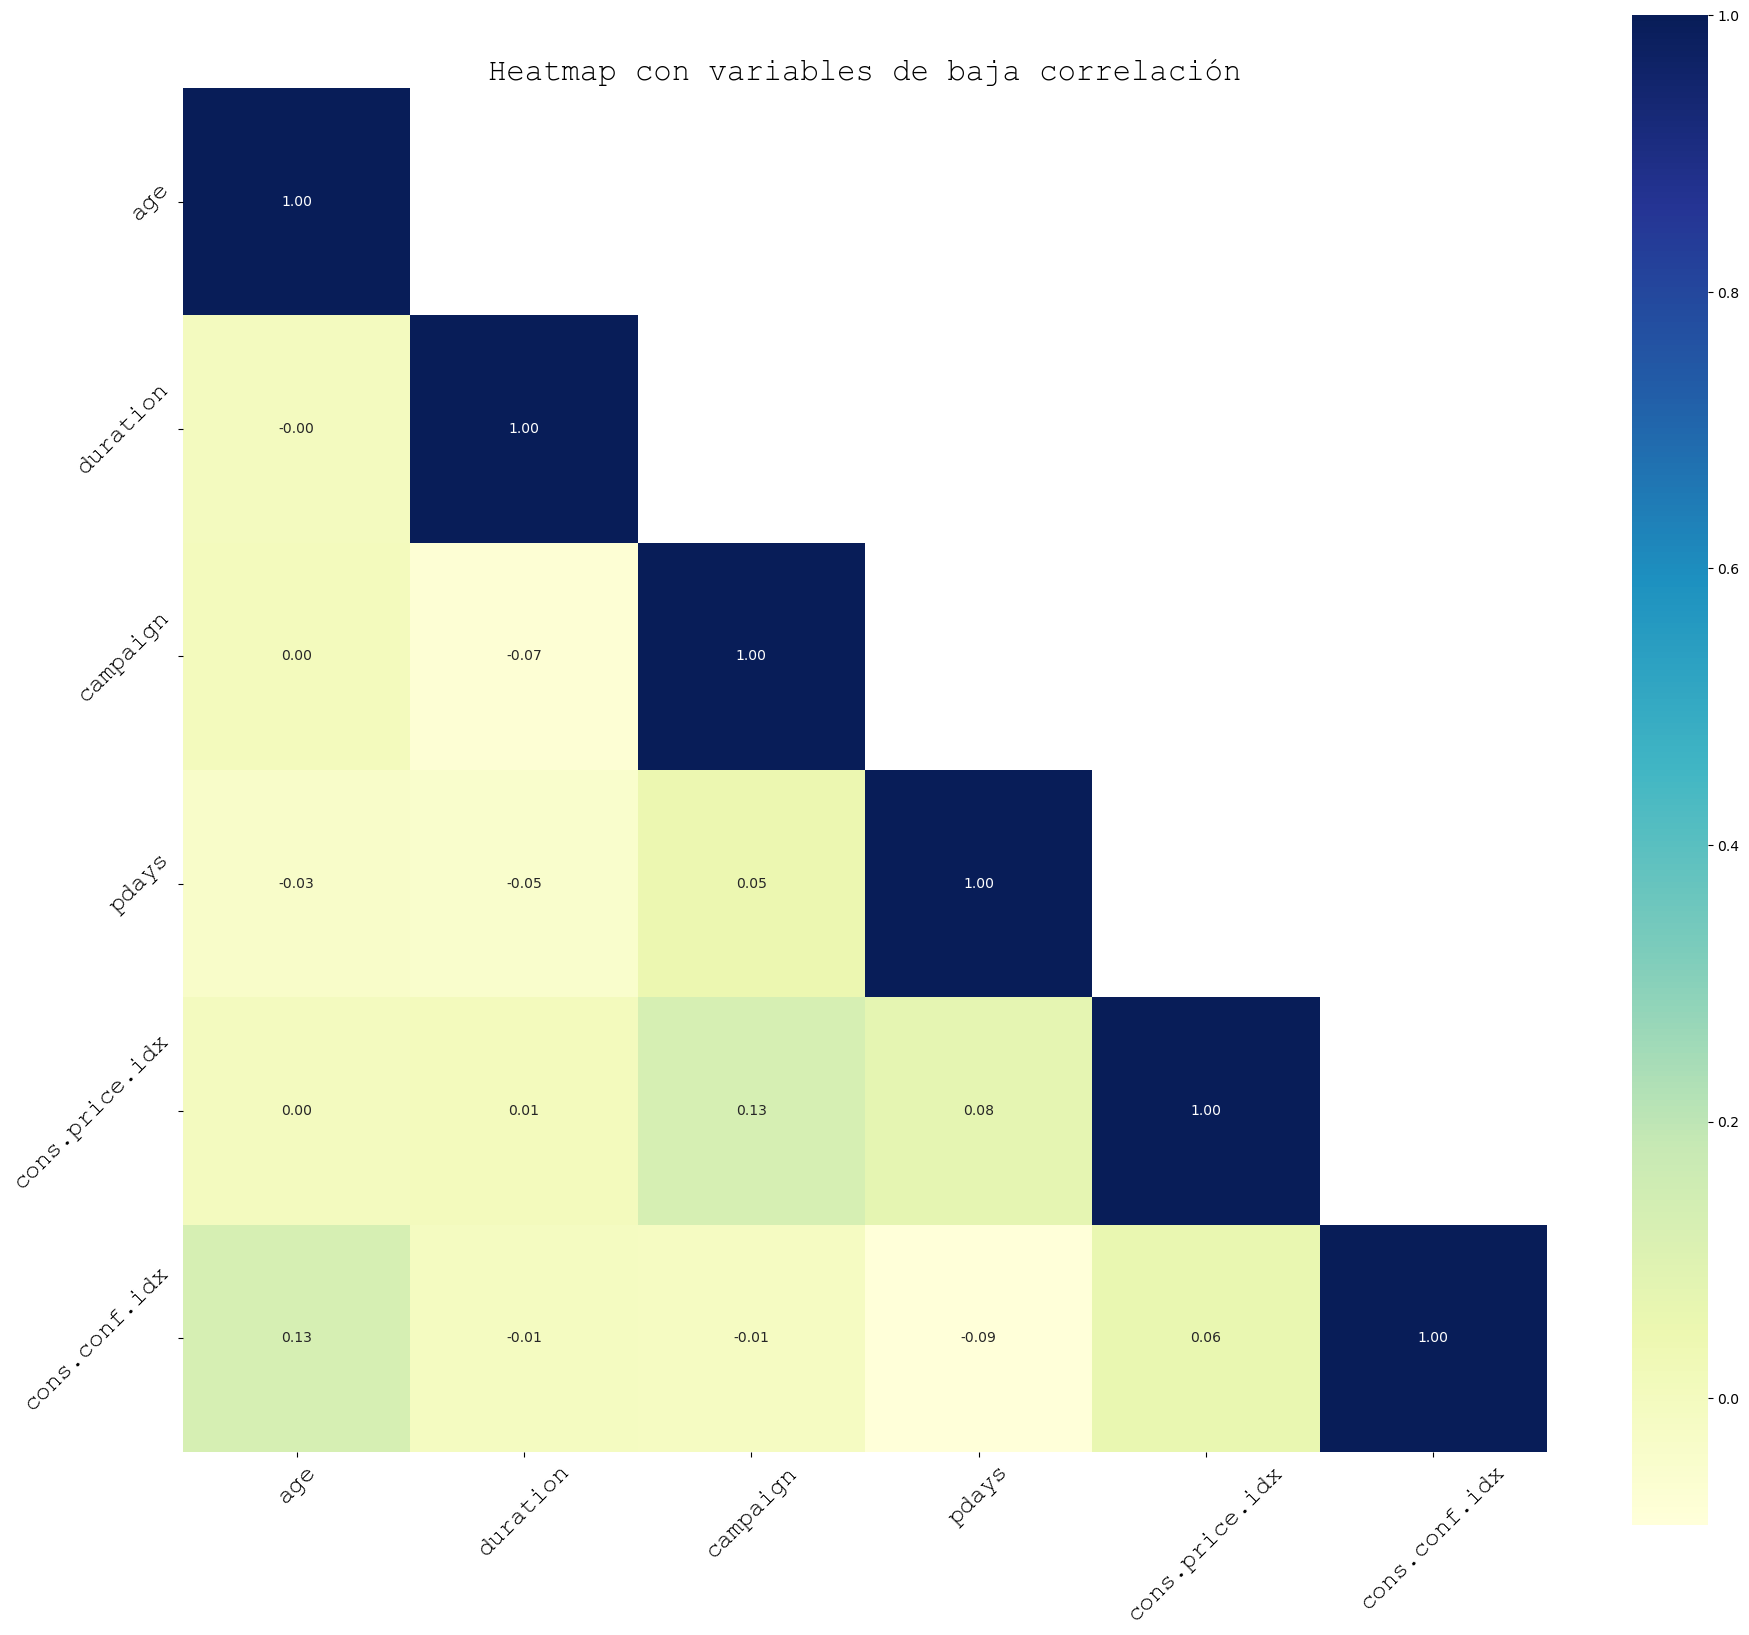

In [14]:
# Muestra de heatmap con las variables restantes

plt.figure(figsize=(22,28))
df_corr2 = df2.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt2 = df_corr2.where(np.tril(np.ones(df_corr2.shape)).astype(bool))
hmap2 = sns.heatmap(df_lt2, annot=True, fmt='.2f', square=True, cmap='YlGnBu', cbar_kws={"shrink": .7})
plt.title('Heatmap con variables de baja correlación', font='Courier New', fontsize=22)
plt.xticks(rotation=45, font='Courier New', fontsize=18,)
plt.yticks(rotation=45, font='Courier New', fontsize=18,)
plt.show()

##### Reportes por grupos : estado civil, educación, trabajo – cuántos registros

In [15]:
df2.groupby('marital')[df2.select_dtypes(include=[np.number]).columns].mean().T

C:\Users\thehe\AppData\Local\Temp\ipykernel_21400\411343357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('marital')[df2.select_dtypes(include=[np.number]).columns].mean().T


marital,divorced,married,single,unknown
age,44.899393,42.307165,33.158714,40.27500
duration,253.790330,257.438623,261.524378,312.72500
campaign,2.613400,2.572810,2.533800,3.18750
pdays,968.639853,967.247673,949.909578,937.10000
cons.price.idx,93.606563,93.597367,93.517300,93.47125
cons.conf.idx,-40.707069,-40.270659,-40.918698,-40.82000


In [16]:
df2.groupby('education')[df2.select_dtypes(include=[np.number]).columns].mean().T

C:\Users\thehe\AppData\Local\Temp\ipykernel_21400\4065490291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('education')[df2.select_dtypes(include=[np.number]).columns].mean().T


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age,47.596504,40.448953,39.061208,37.998213,48.500000,40.080107,38.879191,43.481225
duration,264.827826,264.414485,261.291811,260.886810,276.777778,252.533855,253.223373,262.390526
campaign,2.600575,2.556283,2.532341,2.568576,2.277778,2.586115,2.563527,2.596187
pdays,965.704981,980.368237,979.133168,964.358382,943.833333,960.765974,951.807692,942.830734
cons.price.idx,93.658309,93.650062,93.623399,93.584857,93.317333,93.569864,93.493466,93.658615
cons.conf.idx,-40.239871,-41.127880,-41.326749,-40.940641,-39.950000,-40.124108,-39.975805,-39.877816


In [17]:
df2.groupby('job')[df2.select_dtypes(include=[np.number]).columns].mean().T

C:\Users\thehe\AppData\Local\Temp\ipykernel_21400\356661521.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('job')[df2.select_dtypes(include=[np.number]).columns].mean().T


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,38.187296,39.555760,41.723214,45.500000,42.362859,62.027326,39.949331,37.926430,25.894857,38.507638,39.733728,45.563636
duration,254.312128,264.542360,263.267857,250.454717,257.058140,273.712209,264.142153,258.398085,283.683429,250.232241,249.451677,239.675758
campaign,2.623489,2.558461,2.535714,2.639623,2.476060,2.476744,2.660802,2.587805,2.104000,2.577339,2.564103,2.648485
pdays,954.319229,985.160363,981.267170,960.579245,962.647059,897.936047,976.621393,979.974049,840.217143,964.408127,935.316568,938.727273
cons.price.idx,93.534054,93.656656,93.605372,93.676576,93.522755,93.430786,93.559982,93.634659,93.331613,93.561471,93.563781,93.718942
cons.conf.idx,-40.245433,-41.375816,-41.283654,-39.495283,-40.489466,-38.573081,-40.488107,-41.290048,-40.187543,-39.927569,-40.007594,-38.797879


##### Análisis univariado y bivariado basado en la predicción (y/n) / Dividir dataset entre training y test (70:30)

In [24]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['y'])
y = df2['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
x_train.head()
# y_train.head()
# x_test.head()
# y_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,cons.price.idx,cons.conf.idx
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,77,3,999,failure,92.713,-33.0
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,12,4,999,nonexistent,92.893,-46.2
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,277,2,999,nonexistent,93.994,-36.4
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,70,1,999,failure,92.893,-46.2
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,1181,9,999,nonexistent,92.893,-46.2


In [20]:
print(f'{(len(x_train)/len(df2.index) * 100):.2f}% de los datos se han utilizado para el entrenamiento.')
print(f'{(len(x_test)/len(df2.index) * 100):.2f}% de los datos se han utilizado para la validación.')

70.00% de los datos se han utilizado para el entrenamiento.
30.00% de los datos se han utilizado para la validación.


In [25]:
print('Valores originales: {0} ({1:0.2f}%)'.format(len(df2.loc[df2["y"] == "yes"]), len(df2.loc[df2["y"] == "yes"]) / len(df2.index) * 100))
print('Valores originales: {0} ({1:0.2f}%)'.format(len(df2.loc[df2["y"] == "no"]), len(df2.loc[df2["y"] == "no"]) / len(df2.index) * 100))
print('-' * 50)
print('Valores De Entrenamiento: {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == "yes"]), len(y_train[y_train[:] == "yes"]) / len(y_train.index) * 100))
print('Valores De Entrenamiento: {0} ({1:0.2f}%)'.format(len(y_train[y_train[:] == "no"]), len(y_train[y_train[:] == "no"]) / len(y_train.index) * 100))
print('-' * 50)
print('Valores De Testeo: {0} ({1:0.2f}%)'.format(len(y_test[y_test[:] == "yes"]), len(y_test[y_test[:] == "yes"]) / len(y_test.index) * 100))
print('Valores De Testeo: {0} ({1:0.2f}%)'.format(len(y_test[y_test[:] == "no"]), len(y_test[y_test[:] == "no"]) / len(y_test.index) * 100))

Valores originales: 4640 (11.27%)
Valores originales: 36548 (88.73%)
--------------------------------------------------
Valores De Entrenamiento: 3251 (11.28%)
Valores De Entrenamiento: 25580 (88.72%)
--------------------------------------------------
Valores De Testeo: 1389 (11.24%)
Valores De Testeo: 10968 (88.76%)
